In [ ]:
%run test.ipynb

ERROR:root:File `'test.ipynb.py'` not found.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)




(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


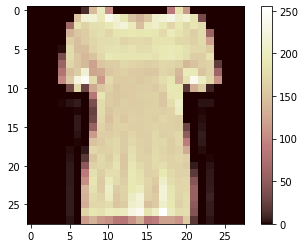

In [ ]:
plt.imshow(train_X[10], cmap = 'pink')
plt.colorbar()
plt.show()

In [ ]:
print(train_X[10])

[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 15

In [ ]:
print("train_X[10].shape : ", train_X[10].shape)
print("train_X[10].ndim : ", train_X[10].ndim)

train_X[10].shape :  (28, 28)
train_X[10].ndim :  2


In [ ]:
train_X_flat = train_X[10].flatten()
# flatten을 해주는 이유가 뭐더라?
print("train_X_flat.shape : ", train_X_flat.shape)
print("train_X_flat.ndim : ", train_X_flat.ndim)


train_X_flat.shape :  (784,)
train_X_flat.ndim :  1


In [ ]:
input_cnt = len(train_X_flat)            #독립변수
output_cnt = len(set(train_Y))           #종속변수
RND_MEAN = 0
RND_STD = 1
weight = np.random.normal(RND_MEAN,RND_STD,size = [input_cnt,output_cnt])
bias = np.random.normal(RND_MEAN,RND_STD,size = [output_cnt])

parameter = {'w' : weight, 'b' : bias}

print("parameter['w'].shape : ",parameter['w'].shape)
print("parameter['w'].ndim : ",parameter['w'].ndim)

print("parameter['b'].shape : ",parameter['b'].shape)
print("parameter['b'].ndim : ",parameter['b'].ndim)
print("=================================================================")

df_w = pd.DataFrame(parameter['w'],
                    columns=['w1','w2','w3','w4','w5','w6','w7','w8','w9','w10'])
df_b = pd.DataFrame(parameter['b'],
                    columns = ['b'])
df_x = pd.DataFrame(train_X_flat, columns= ['input_data'])

df_data = pd.concat([df_x, df_w, df_b],axis = 1)

y_hat_1 = np.matmul(df_data['input_data'],df_data['w1']) + df_data['b'][0]
y_hat_2 = np.matmul(df_data['input_data'],df_data['w2']) + df_data['b'][1]
y_hat_3 = np.matmul(df_data['input_data'],df_data['w3']) + df_data['b'][2]
y_hat_4 = np.matmul(df_data['input_data'],df_data['w4']) + df_data['b'][3]
y_hat_5 = np.matmul(df_data['input_data'],df_data['w5']) + df_data['b'][4]
y_hat_6 = np.matmul(df_data['input_data'],df_data['w6']) + df_data['b'][5]
y_hat_7 = np.matmul(df_data['input_data'],df_data['w7']) + df_data['b'][6]
y_hat_8 = np.matmul(df_data['input_data'],df_data['w8']) + df_data['b'][7]
y_hat_9 = np.matmul(df_data['input_data'],df_data['w9']) + df_data['b'][8]
y_hat_10 = np.matmul(df_data['input_data'],df_data['w10']) + df_data['b'][9]

y_hat_total = np.matmul(df_data['input_data'], parameter['w']) + parameter['b']
np.exp(y_hat_total)
f_mnist_max = np.max(y_hat_total)

diff_y_hat_row = []
for i in range(len(y_hat_total)):
    diff_y_hat = y_hat_total[i] - f_mnist_max
    diff_y_hat_row.append(diff_y_hat)
print("diff_y_hat_row : \n", diff_y_hat_row)
print("==========================================================")

exp_y_hat_row = []
for i in range(len(diff_y_hat_row)):
    exp_y_hat = np.exp(diff_y_hat_row[i])
    exp_y_hat_row.append(exp_y_hat)
print("exp_y_hat_row : \n",exp_y_hat_row)
print("==========================================================")

exp_i_sum = np.sum(exp_y_hat_row)
result = []

for i in range(len(exp_y_hat_row)):
    result.append(exp_y_hat_row[i]/exp_i_sum)

result = np.round(result,3)

for i in range(len(result)):
    print("Label {} : {} %".format(i, result[i] * 100))
print("==========================================================")
print("Result Predict - {} label".format(np.argmax(result)))
print("Y_Label : ", train_Y[10])
print("Total % : {}%".format(np.round(np.sum(result) * 100 ,2)))
print("==========================================================")


parameter['w'].shape :  (784, 10)
parameter['w'].ndim :  2
parameter['b'].shape :  (10,)
parameter['b'].ndim :  1
diff_y_hat_row : 
 [-15750.69153291882, -9793.05736394997, -14408.774138872977, -11436.32815422116, -9270.91014737945, -7247.539348920266, -7201.93147246091, 0.0, -8709.058915683829, -11523.617537530075]
exp_y_hat_row : 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Label 0 : 0.0 %
Label 1 : 0.0 %
Label 2 : 0.0 %
Label 3 : 0.0 %
Label 4 : 0.0 %
Label 5 : 0.0 %
Label 6 : 0.0 %
Label 7 : 100.0 %
Label 8 : 0.0 %
Label 9 : 0.0 %
Result Predict - 7 label
Y_Label :  0
Total % : 100.0%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


In [ ]:
df_data

,input_data,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,b
0,0,0.796383,-0.124280,-1.209282,0.519206,-0.410066,-1.130013,-1.517912,-1.357773,-0.296948,0.224674,0.385317
1,0,-0.568989,-0.373942,-0.359312,0.316106,2.104777,-0.971129,-0.387224,0.345566,-0.314498,0.844996,-1.226003
2,0,0.211865,0.894542,-0.170066,0.118994,-1.153007,-0.149580,-0.604831,0.808186,-1.406405,0.518307,1.018751
3,0,-0.303473,-0.054418,-0.528903,1.111420,0.298749,-2.444934,0.228846,-1.501724,-2.283122,-0.421033,-0.961263
4,0,0.763958,-0.140143,-0.407843,0.715037,0.519563,-0.489937,1.331801,0.149922,-0.530081,0.087111,1.924924
...,...,...,...,...,...,...,...,...,...,...,...,...
779,3,-0.420840,1.246961,-0.435832,0.272333,-0.794621,-0.803170,-0.145529,0.436515,-1.190566,-0.198757,NaN
780,0,-1.562005,0.556694,0.769470,0.082830,0.285829,-0.103945,0.230251,-1.096563,1.496068,1.286530,NaN
781,0,1.555932,3.460199,0.733423,0.033148,-0.920553,-0.999101,0.170343,-0.683289,0.060548,0.903070,NaN
782,0,0.088035,-3.016495,-0.277975,-0.403808,-0.825037,2.450911,0.279754,0.827029,0.634375,-1.292203,NaN
